In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
def get_dictionaries(ratingsdf,usercol,itemcol,ratingcol):
    users = list(set(ratingsdf[usercol].values))
    items = list(set(ratingsdf[itemcol].values))
    ratings_by_user = {user_id:{} for user_id in users}
    users_by_item = {item_id:[] for item_id in items}
    for review_index in ratingsdf.index:
        user_id = ratingsdf[usercol][review_index]
        item_id = ratingsdf[itemcol][review_index]
        rating = ratingsdf[ratingcol][review_index]
        ratings_by_user[user_id][item_id] = rating
        users_by_item[item_id].append(user_id)
    return ratings_by_user,users_by_item

def flatten_list(l:list)->list:
    newl = []
    for l0 in l:
        newl+=l0
    return newl

def tally(l:list)->dict:
    counts = {item:0 for item in set(l)}
    for item in l:
        counts[item]+=1
    return counts


In [205]:
reviews = pd.read_pickle('../data/revdense.pk')
keywords =  pd.read_pickle('../data/keywords.pk')
recipe_ids = list(set(keywords.index).intersection(set(reviews.RecipeId.values)))
keywords = keywords[keywords.index.isin(recipe_ids)]
reviews = reviews[reviews['RecipeId'].isin(recipe_ids)]



In [206]:
keywords_w_rep = []
for kws in keywords.Keywords:
    keywords_w_rep+=list(kws)

keyword_counts = {word:0 for word in set(keywords_w_rep)}
for word in keywords_w_rep:
    keyword_counts[word]+=1

keyword_list_master = list(keyword_counts.keys())
keyword_index = {keyword_list_master[i]:i for 
                 i in range(len(keyword_list_master))}

def kwlist_to_vec(keywordlist:list)->list:
    vec = np.zeros(len(keyword_list_master))
    for w in keywordlist:
        vec[keyword_index[w]]+=1
    return vec

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
rev_train, rev_test = train_test_split(rev_df,
                                       test_size=0.2,
                                       random_state=193,
                                       stratify=rev_df['UserId'])

In [209]:
user_ratings,items_by_user = get_dictionaries(rev_train,
                                              'UserId',
                                              'RecipeId',
                                              'Rating')

In [210]:
def related_users(user:int)->list:
    recs = list(user_ratings[user].keys())
    return tally(flatten_list([items_by_user[recipe] for recipe in recs]))

def user_neighborhood(user):
    return rev_train[rev_train['UserId'].isin(related_users(user))]

def user_ranking_v0(user):
    ranking_user = list(user_neighborhood(user)['RecipeId'].value_counts().index)
    return {ranking_user[i]:i for i in range(len(ranking_user))}


In [211]:
user_rankings = {user:user_ranking_v0(user) for user in user_list}
baseline_ranking = rev_train_baseline_ranking

train_mean_rankings_v0 = {}
train_mean_rankings_bl = {}
test_mean_rankings_v0 = {}
test_mean_rankings_bl = {}

for user in user_list:
    user_recs_train = rev_train.loc[rev_train.UserId == user]['RecipeId'].values
    train_mean_rankings_v0[user] = np.mean([user_rankings[user][rec] for rec in user_recs_train])
    train_mean_rankings_bl[user] = np.mean([baseline_ranking[rec] for rec in user_recs_train])
    user_recs_test = rev_test.loc[rev_test.UserId == user]['RecipeId'].values
    test_mean_rankings_v0[user] = np.mean([user_rankings[user][rec] for rec in user_recs_test])
    test_mean_rankings_bl[user] = np.mean([baseline_ranking[rec] for rec in user_recs_test])

KeyboardInterrupt: 

In [ ]:
def mean_rec(l):
    return np.mean([1/(r+1) for r in l])


In [ ]:
train_meanrec_rankings_v0 = {}
train_meanrec_rankings_bl = {}
test_meanrec_rankings_v0 = {}
test_meanrec_rankings_bl = {}


for user in user_list:
    user_recs_train = rev_train.loc[rev_train.UserId == user]['RecipeId'].values
    train_meanrec_rankings_v0_f[user] = mean_rec([user_rankings[user][rec] for rec in user_recs_train])
    train_meanrec_rankings_bl_f[user] = mean_rec([baseline_ranking[rec] for rec in user_recs_train])
    user_recs_test = rev_test.loc[rev_test.UserId == user]['RecipeId'].values
    test_meanrec_rankings_v0_f[user] = mean_rec([user_rankings[user][rec] for rec in user_recs_test])
    test_meanrec_rankings_bl_f[user] = mean_rec([baseline_ranking[rec] for rec in user_recs_test])

In [ ]:
train_meanrec_rankings_v0_0 = {}
train_meanrec_rankings_bl_0 = {}
test_meanrec_rankings_v0_0 = {}
test_meanrec_rankings_bl_0 = {}


for user in user_list:
    user_recs_train = rev_train.loc[rev_train.UserId == user]['RecipeId'].values
    train_meanrec_rankings_v0_0[user] = 1/(1+min([user_rankings[user][rec] for rec in user_recs_train]))
    train_meanrec_rankings_bl_0[user] = 1/(1+min([baseline_ranking[rec] for rec in user_recs_train]))
    user_recs_test = rev_test.loc[rev_test.UserId == user]['RecipeId'].values
    test_meanrec_rankings_v0_0[user] = 1/(1+min([user_rankings[user][rec] for rec in user_recs_test]))
    test_meanrec_rankings_bl_0[user] = 1/(1+min([baseline_ranking[rec] for rec in user_recs_test]))

In [ ]:
mean_rankings = pd.DataFrame({'UserId':user_list,
                 'Train_v0':[train_mean_rankings_v0[user] for user in user_list],
                 'Train_bl':[train_mean_rankings_bl[user] for user in user_list],
                 'Test_v0':[test_mean_rankings_v0[user] for user in user_list],
                 'Test_bl':[test_mean_rankings_bl[user] for user in user_list],
                 'Train_v0_r':[train_meanrec_rankings_v0_0[user] for user in user_list],
                 'Train_bl_r':[train_meanrec_rankings_bl_0[user] for user in user_list],
                 'Test_v0_r':[test_meanrec_rankings_v0_0[user] for user in user_list],
                 'Test_bl_r':[test_meanrec_rankings_bl_0[user] for user in user_list],
                 'Train_v0_r':[train_meanrec_rankings_v0_0[user] for user in user_list],
                 'Train_bl_r':[train_meanrec_rankings_bl_0[user] for user in user_list],
                 'Test_v0_r':[test_meanrec_rankings_v0_0[user] for user in user_list],
                 'Test_bl_r':[test_meanrec_rankings_bl_0[user] for user in user_list]})

mean_rankings = mean_rankings.set_index('UserId')

0.1220155657011023

## Keywords

In [ ]:
rev_train

,UserId,RecipeId,Rating,Rating_old,Keywords
ReviewId,,,,,
193829,160974,119804,1,5,"[fruit, brunch, tropical fruits, easy, lunch/s..."
741876,765437,32607,1,5,"[healthy, kid friendly, weeknight, inexpensive..."
497583,467341,141789,1,5,"[pork, easy, vegetable, rice, oven, meat]"
965678,140132,3294,1,5,"[chicken, fried, deep fried, meat, poultry]"
1158117,253706,43850,1,5,"[kid friendly, easy, inexpensive, halloween, b..."
...,...,...,...,...,...
864105,600105,76616,1,5,"[ham, burger, easy, meatballs, taco, stew, meat]"
473116,55578,52799,-1,4,"[cheese, oven]"
1058849,145125,39900,1,5,"[chicken, european, meat, poultry]"


In [ ]:
keywords_w_rep = []
for kws in rev_train.Keywords:
    keywords_w_rep+=list(kws)

keyword_counts = {word:0 for word in set(keywords_w_rep)}
for word in keywords_w_rep:
    keyword_counts[word]+=1

keyword_list_master = list(keyword_counts.keys())
keyword_index = {keyword_list_master[i]:i for 
                 i in range(len(keyword_list_master))}

def kwlist_to_vec(keywordlist:list)->list:
    vec = np.zeros(len(keyword_list_master))
    for w in keywordlist:
        vec[keyword_index[w]]+=1
    return vec

In [ ]:
rec_mat = [kwlist_to_vec(kwl) for kwl in rev_train.Keywords]
keyword_vec_mean = sum(rec_mat)/len(rec_mat)

In [ ]:
user_kw_vecs = {}
user_kw_vecs_0 = {}
for user in user_list:
    kw_vecs_user = [kwlist_to_vec(kwl) for kwl in rev_train.loc[rev_train.UserId==user].Keywords]
    user_mean_kwvec = sum(kw_vecs_user)/len(kw_vecs_user)
    user_kw_vecs[user]=user_mean_kwvec
    user_kw_vecs_0[user] = user_mean_kwvec-keyword_vec_mean

user_kw_vecs_0_ls = {user:np.sqrt(np.dot(user_kw_vecs_0[user],user_kw_vecs_0[user])) for user in user_list}

In [ ]:
max(list(user_kw_vecs_0_ls.values()))

1.100965365306682

In [ ]:
rev_df[['UserId','RecipeId','Keywords']]

,UserId,RecipeId,Keywords
ReviewId,,,
829,7802,8782,"[ham, chicken, easy, weeknight, roast, oven, m..."
1179,9869,8754,"[peanut butter, sweet, for large groups, oven,..."
1399,6357,9841,"[easy, oven]"
1642,11297,5478,"[healthy, chicken, sweet, easy, baking, potato..."
1771,4470,8739,"[southwestern u.s., mexican, easy, avocado, th..."
...,...,...,...
2090011,395981,116266,"[potluck, chicken, spicy, for large groups, me..."
2090051,137477,12591,"[healthy, for large groups, oven]"
2090149,3288,261889,"[kid friendly, sweet, christmas, easy, for lar..."


In [ ]:
rev_df.UserId.value_counts()

UserId
140132     2137
37449      1362
176615     1161
383346     1129
126440     1097
           ... 
1026228       2
371096        2
443407        2
279205        2
1422300       2
Name: count, Length: 4895, dtype: int64

In [ ]:
len(rev_df.RecipeId.unique())

13031

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

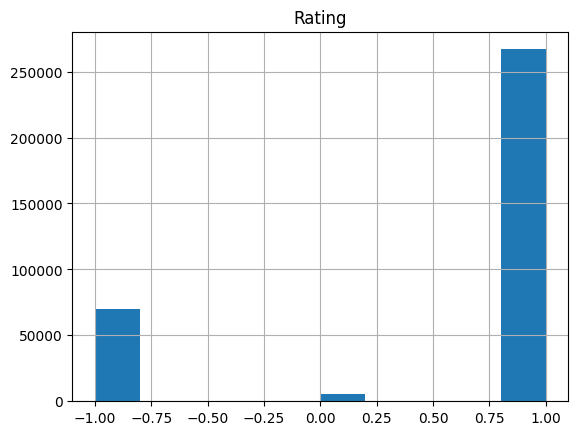

In [ ]:
rev_df.hist('Rating')

In [ ]:
[w for w in keyword_list_master if 'ese' in w or 'can' in w or 'ese' in w or 'ino' in w]

['vietnamese',
 'filipino',
 'japanese',
 'lebanese',
 'mexican',
 'moroccan',
 'chinese',
 'cheesecake',
 'canadian',
 'african',
 'portuguese',
 'south american',
 'canning',
 'scandinavian',
 'puerto rican',
 'south african',
 'candy',
 'cheese',
 'costa rican']